### Importing all the necessary function

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Dataset of Football Player's Transfer fees



In [416]:
transfer = pd.read_csv('~/Desktop/transfer1.csv')
transfer = transfer.sort_values(by="Transfer_fee",ascending=False)
transfer[['Name','Position','Transfer_fee']]

,Name,Position,Transfer_fee
4211,Neymar,Left Winger,222000000
4455,Kylian Mbappé,Right Winger,135000000
4212,Philippe Coutinho,Attacking Midfield,125000000
4456,Cristiano Ronaldo,Centre-Forward,117000000
4213,Ousmane Dembélé,Right Winger,115000000
...,...,...,...
736,Apostolos Liolidis,Right Winger,900000
735,Sebastián Cejas,Goalkeeper,900000
734,Kléber Pereira,Centre-Forward,900000
740,Cata Díaz,Centre-Back,850000


# Dataset of FIFA Football Player's Statistics including positions,overall_rating,club_team etc.



In [417]:
df = pd.read_csv('~/Desktop/fifa.csv')
df[['name','full_name','positions','overall_rating']]

,name,full_name,positions,overall_rating
0,L. Messi,Lionel Andrés Messi Cuccittini,"CF,RW,ST",94
1,C. Eriksen,Christian Dannemann Eriksen,"CAM,RM,CM",88
2,P. Pogba,Paul Pogba,"CM,CAM",88
3,L. Insigne,Lorenzo Insigne,"LW,ST",88
4,K. Koulibaly,Kalidou Koulibaly,CB,88
...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,"RM,CAM,CM",67
17950,M. Sipľak,Michal Sipľak,LB,59
17951,J. Bekkema,Jan Bekkema,GK,59
17952,A. Al Yami,Abdulrahman Al Yami,"ST,LM",59


#  Classifying the different football players based on their Positions



Goalkeeper: Goalkeeper

In [418]:
goalkeeper = transfer.copy()
gkKey = ['Goalkeeper']
goalkeeper = goalkeeper[goalkeeper['Position'].str.contains('|'.join(gkKey),case=False)]
goalkeeper = goalkeeper.drop_duplicates(subset=['Name'],keep='first')
goalkeeper = goalkeeper.sort_values('Transfer_fee',ascending=False)



In [419]:
d = df.copy()
d = d[d['positions'].str.contains('GK')]
d = d.drop_duplicates(subset=['full_name'],keep='first')


### Merging two dataframes together by partial match of the football player's name 

In [420]:
goalkeeper['join'] = 1
d['join'] = 1
dataFrameFull = d.merge(goalkeeper, on='join').drop('join', axis=1)

goalkeeper.drop('join', axis=1, inplace=True)

dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.full_name.find(x.Name), axis=1).ge(0)
r = dataFrameFull[dataFrameFull['match']]
gkDF = r[['Name','name','full_name','positions','overall_rating','Transfer_fee']].drop_duplicates(subset=['Name']).sort_values('Transfer_fee',ascending=False)
gkDF


,Name,name,full_name,positions,overall_rating,Transfer_fee
288120,Alisson,Alisson,Alisson Ramses Becker,GK,87,62500000
288261,Gianluigi Buffon,G. Buffon,Gianluigi Buffon,GK,88,52880000
287982,Ederson,Ederson,Ederson Santana de Moraes,GK,86,40000000
3,Manuel Neuer,M. Neuer,Manuel Neuer,GK,89,30000000
286724,Jordan Pickford,J. Pickford,Jordan Pickford,GK,83,28500000
286026,Bernd Leno,B. Leno,Bernd Leno,GK,83,25000000
276508,Alex Meret,A. Meret,Alex Meret,GK,76,22000000
288692,Jan Oblak,J. Oblak,Jan Oblak,GK,90,16000000
259855,Danny Ward,D. Ward,Danny Ward,GK,73,14000000
284637,Jasper Cillessen,J. Cillessen,Jasper Cillessen,GK,82,13000000


Text(0.5, 0, 'Transfer_fee (Euros)')

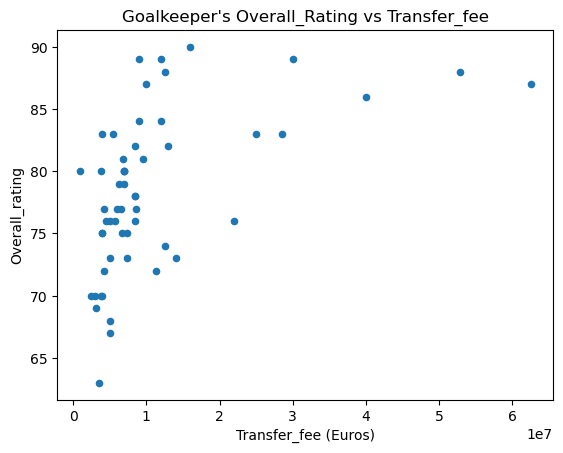

In [421]:
gkGraph = gkDF.plot.scatter(y='overall_rating',x='Transfer_fee')
gkGraph.set_title("Goalkeeper's Overall_Rating vs Transfer_fee")
gkGraph.set_ylabel("Overall_rating")
gkGraph.set_xlabel("Transfer_fee (Euros)")

### Removing outliers based on visualization -> Transfer_fee < 20M Euros & overall_rating > 65

Text(0.5, 0, 'Transfer_fee (Euros)')

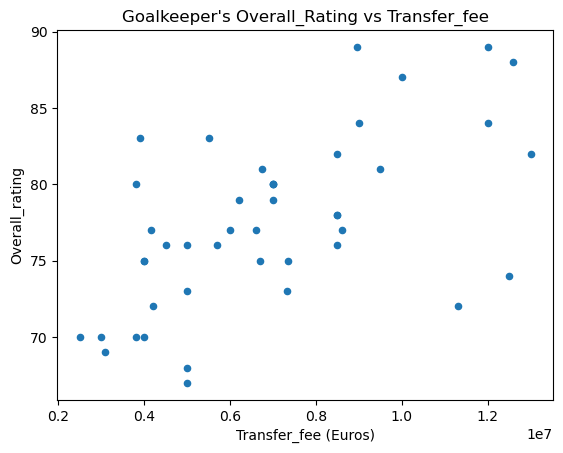

In [422]:
gkDF = gkDF.loc[gkDF['Transfer_fee'] < 14000000]
gkDF = gkDF.loc[gkDF['Transfer_fee'] > 2000000]
gkDF = gkDF.loc[gkDF['overall_rating'] > 65]
gkGraph = gkDF.plot.scatter(x='Transfer_fee',y='overall_rating')
gkGraph.set_title("Goalkeeper's Overall_Rating vs Transfer_fee")
gkGraph.set_ylabel("Overall_rating")
gkGraph.set_xlabel("Transfer_fee (Euros)")

### Goalkeeper's Graph with best-fit using Linear Regression

Text(0.5, 0, 'Transfer_fee (Euros)')

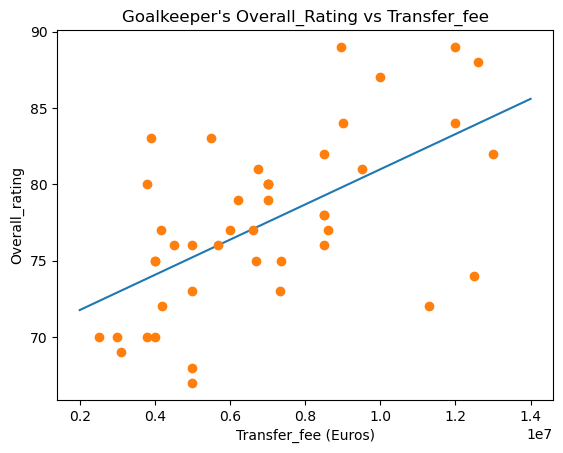

In [423]:
Y = np.array(gkDF['overall_rating'])
X = np.array(gkDF['Transfer_fee'])

n = len(X)
xbar = np.mean(X)
ybar = np.mean(Y)
Sxy = sum([(X[i] - xbar)*(Y[i] - ybar) for i in range(n)])
Sxx = sum([(X[i] - xbar)**2 for i in range(n)])
Beta1 = (Sxy)/(Sxx)
Beta0 = ybar - Beta1*xbar
xrange = np.linspace(2000000,14000000)
line = Beta0 + Beta1 * xrange
plt.plot(xrange,line)
plt.plot(X,Y,"o")
plt.title("Goalkeeper's Overall_Rating vs Transfer_fee")
plt.ylabel("Overall_rating")
plt.xlabel("Transfer_fee (Euros)")

In [424]:
import statsmodels.api as sm

ols = sm.OLS(Y,X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              320.6
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                    1.50e-21
Time:                        15:29:30   Log-Likelihood:                         -206.95
No. Observations:                  44   AIC:                                      415.9
Df Residuals:                      43   BIC:                                      417.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, "Residual Histogram for Goalkeeper's Data")

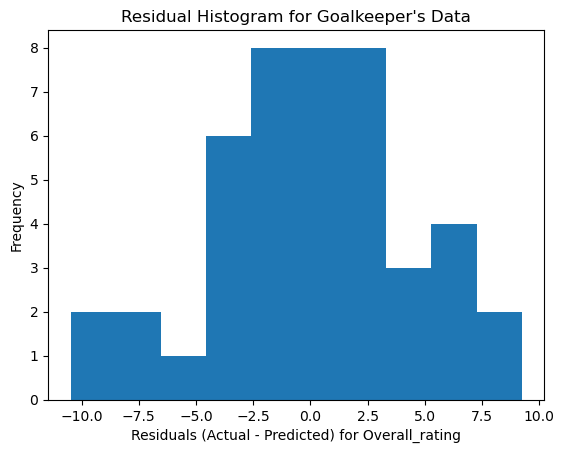

In [425]:
predicted_values = []
for x in X:
    predicted_values.append(Beta0 + Beta1 * x)

residuals = []
for idx in range(len(Y)):
    residuals.append(Y[idx] - predicted_values[idx])

plt.hist(residuals,bins=10)
plt.xlabel("Residuals (Actual - Predicted) for Overall_rating")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Goalkeeper's Data")


# **Conclusion:** Goalkeeper

Since p-value of this model is 0, it indicates that the Transfer_fee is statistically significant and can reject the null hypothesis. With an R-squared value of 0.882, we can say that the data fit the model quite good. With the line-of-best-fit plotted, we can also say that there is a slightly positive correlation between Transfer_fee and overall_rating.

As the t-value of the model is rather high meaning that the std error is rather small compared to the coefficient which signifies high significance of the coefficient. 

The above Residual Histogram looks good as well because it is clustering around 0 which suggest the linear model is a good fit.

Defender: Centre-Back, Left-Back, Right-Back, Sweeper

In [426]:
defender = transfer.copy()
defKey = ['Back','Defender','Sweeper']
defender = defender[defender['Position'].str.contains('|'.join(defKey),case=False)]
defender = defender.drop_duplicates(subset=['Name'],keep='first')
defender = defender.sort_values('Transfer_fee',ascending=False)

In [427]:
d1 = df.copy()
defK = ['CB','CH','LB','LCB','LH','LWB','OB','RB','RCB','RWB','SW','WB']
d1 = d1[d1['positions'].str.contains('|'.join(defK),case=False)]
d1 = d1.drop_duplicates(subset=['full_name'],keep='first')

In [428]:
defender['join'] = 1
d1['join'] = 1
dataFrameFull = d1.merge(defender, on='join').drop('join', axis=1)

defender.drop('join', axis=1, inplace=True)

dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.full_name.find(x.Name), axis=1).ge(0)
r = dataFrameFull[dataFrameFull['match']]
defDF = r[['Name','name','full_name','positions','overall_rating','Transfer_fee']].drop_duplicates(subset=['Name']).sort_values('Transfer_fee',ascending=False)
defDF


,Name,name,full_name,positions,overall_rating,Transfer_fee
831,Virgil van Dijk,V. van Dijk,Virgil van Dijk,CB,88,78800000
18284,Benjamin Mendy,B. Mendy,Benjamin Mendy,LB,81,57500000
5422278,John Stones,J. Stones,John Stones,CB,83,55600000
4572166,Kyle Walker,K. Walker-Peters,Kyle Walker-Peters,"RB,LB",71,52700000
5416463,David Luiz,David Luiz,David Luiz Moreira Marinho,CB,83,49500000
...,...,...,...,...,...,...
519319,Leandro,L. Grimi,Leandro Damián Marcelo Grimi,"LB,CB",69,2000000
2177183,Azar Karadas,A. Karadas,Azar Karadas,"ST,CB",61,1750000
2850296,Juan Fernández,Juan Ibiza,Juan Fernández Blanco,CB,64,1650000
347339,Fernando,F. Navarro,Fernando Navarro Morán,RB,71,1200000


Text(0.5, 0, 'Transfer_fee (Euros)')

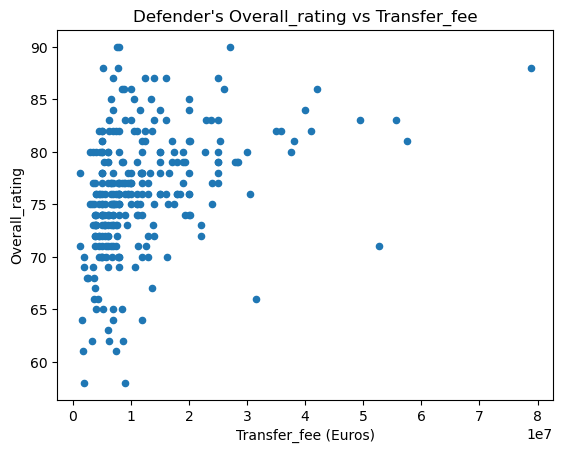

In [429]:
defGraph = defDF.plot.scatter(y='overall_rating',x='Transfer_fee')
defGraph.set_title("Defender's Overall_rating vs Transfer_fee")
defGraph.set_ylabel("Overall_rating")
defGraph.set_xlabel("Transfer_fee (Euros)")

### Removing outliers based on visualization -> Transfer_fee < 30M Euros & overall_rating > 60

Text(0.5, 0, 'Transfer_fee (Euros)')

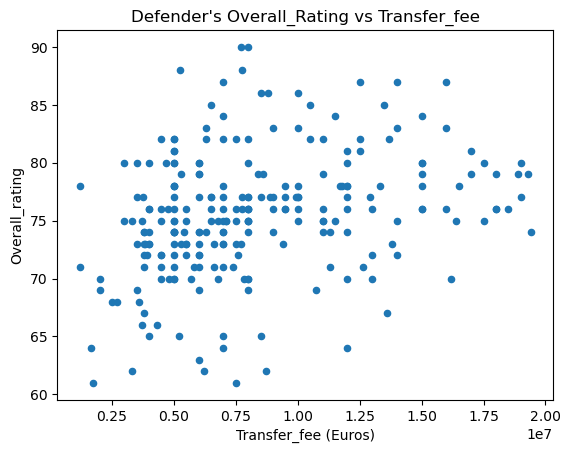

In [430]:
defDF = defDF.loc[defDF['Transfer_fee'] < 20000000]
defDF = defDF.loc[defDF['overall_rating'] > 60]
defGraph = defDF.plot.scatter(y='overall_rating',x='Transfer_fee')
defGraph.set_title("Defender's Overall_Rating vs Transfer_fee")
defGraph.set_ylabel("Overall_rating")
defGraph.set_xlabel("Transfer_fee (Euros)")

### Defender's Graph with best-fit

Text(0.5, 0, 'Transfer_fee (Euros)')

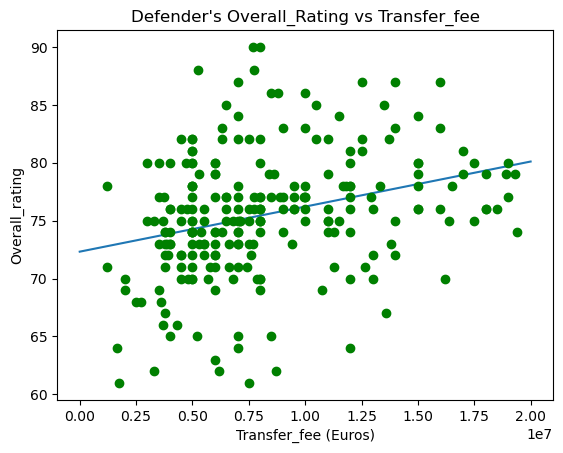

In [431]:
Y = np.array(defDF['overall_rating'])
X = np.array(defDF['Transfer_fee'])

n = len(X)
xbar = np.mean(X)
ybar = np.mean(Y)
Sxy = sum([(X[i] - xbar)*(Y[i] - ybar) for i in range(n)])
Sxx = sum([(X[i] - xbar)**2 for i in range(n)])
Beta1 = (Sxy)/(Sxx)
Beta0 = ybar - Beta1*xbar
xrange = np.linspace(0,20000000)
plt.plot(xrange,Beta0 + Beta1 * xrange)
plt.plot(X,Y,"go")
plt.title("Defender's Overall_Rating vs Transfer_fee")
plt.ylabel("Overall_rating")
plt.xlabel("Transfer_fee (Euros)")

In [432]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              1030.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                    5.24e-89
Time:                        15:31:36   Log-Likelihood:                         -1189.3
No. Observations:                 242   AIC:                                      2381.
Df Residuals:                     241   BIC:                                      2384.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, "Residual Histogram for Defender's Data")

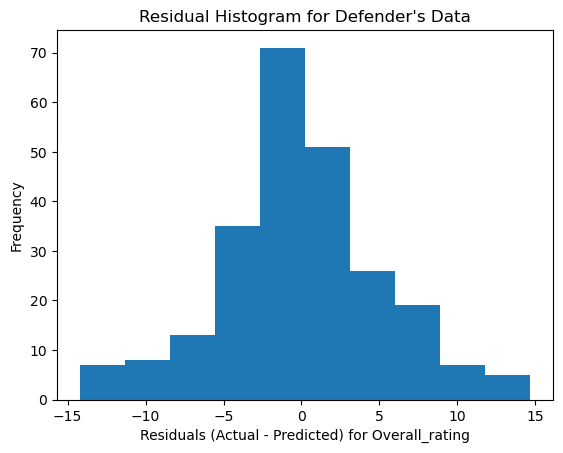

In [433]:
predicted_values = []
for x in X:
    predicted_values.append(Beta0 + Beta1 * x)

residuals = []
for idx in range(len(Y)):
    residuals.append(Y[idx] - predicted_values[idx])

plt.hist(residuals,bins=10)
plt.xlabel("Residuals (Actual - Predicted) for Overall_rating")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Defender's Data")


# **Conclusion:** Defender

Since p-value of this model is 0, it indicates that the Transfer_fee is statistically significant and can reject the null hypothesis. With an R-squared value of 0.810, it is quite good. With the line-of-best-fit plotted, we can also say that there is a slightly positive correlation between Transfer_fee and overall_rating.

As the t-value of the model is rather high meaning that the std error is rather small compared to the coefficient which signifies high significance of the coefficient

The above Residual Histogram looks good as well because it is clustering around 0 which suggest the linear model is a good fit.

Midfield: Attacking Midfield, Central Midfield, Defensive Midfield, Midfielder

In [434]:
midfield = transfer.copy()
midKey = ['Midfield']
midfield = midfield[midfield['Position'].str.contains('|'.join(midKey),case=False)]
midfield = midfield.drop_duplicates(subset=['Name'],keep='first')
midfield = midfield.sort_values('Transfer_fee',ascending=False)

In [435]:
d2 = df.copy()
midK = ['AM','AMC','AMF','AML','AMR','CAM','CDM','CM','CMF','DM','LM','M','RM']
d2 = d2[d2['positions'].str.contains('|'.join(midK),case=False)]
d2 = d2.drop_duplicates(subset=['full_name'],keep='first')

In [436]:
midfield['join'] = 1
d2['join'] = 1
dataFrameFull = d2.merge(midfield, on='join').drop('join', axis=1)

midfield.drop('join', axis=1, inplace=True)

dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.full_name.find(x.Name), axis=1).ge(0)
r = dataFrameFull[dataFrameFull['match']]
midDF = r[['Name','name','full_name','positions','overall_rating','Transfer_fee']].drop_duplicates(subset=['Name']).sort_values('Transfer_fee',ascending=False)
midDF


,Name,name,full_name,positions,overall_rating,Transfer_fee
8289528,Philippe Coutinho,Coutinho,Philippe Coutinho Correia,"LW,RW,CM",88,125000000
979,Paul Pogba,P. Pogba,Paul Pogba,"CM,CAM",88,105000000
8294421,Kevin De Bruyne,K. De Bruyne,Kevin De Bruyne,"CAM,CM",91,76000000
8247480,Naby Keïta,N. Keïta,Naby Keïta,"CM,CDM,CAM",83,60000000
500743,Oscar,C. Bernardi,Cristian Oscar Bernardi,"RM,LM,CM,CDM",72,60000000
...,...,...,...,...,...,...
1349554,John Welsh,J. Welsh,John Welsh,"CDM,CM",65,2250000
430263,Miguel Ángel,De las Cuevas,Miguel Ángel De las Cuevas Barberá,"LM,CM,RM,CAM",72,2000000
4238622,Lee Martin,L. Martin,Lee Martin,"CAM,LM,RM",64,1500000
170144,Atiba Hutchinson,A. Hutchinson,Atiba Hutchinson,"CDM,CM",76,1500000


Text(0.5, 0, 'Transfer_fee (Euros)')

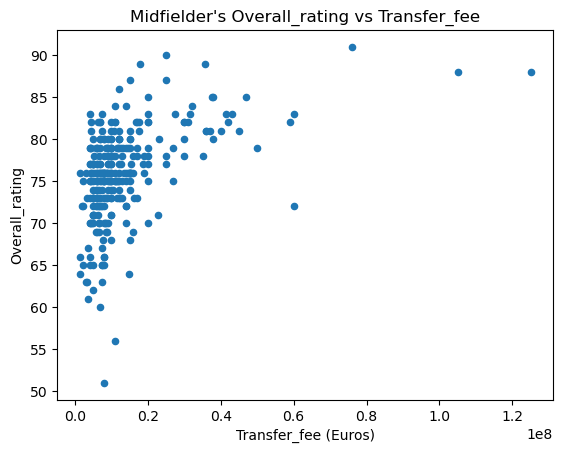

In [437]:
midGraph = midDF.plot.scatter(y='overall_rating',x='Transfer_fee')
midGraph.set_title("Midfielder's Overall_rating vs Transfer_fee")
midGraph.set_ylabel("Overall_rating")
midGraph.set_xlabel("Transfer_fee (Euros)")

### Removing outliers based on visualization -> Transfer_fee < 0.4M Euros & overall_rating > 60

Text(0.5, 0, 'Transfer_fee (Euros)')

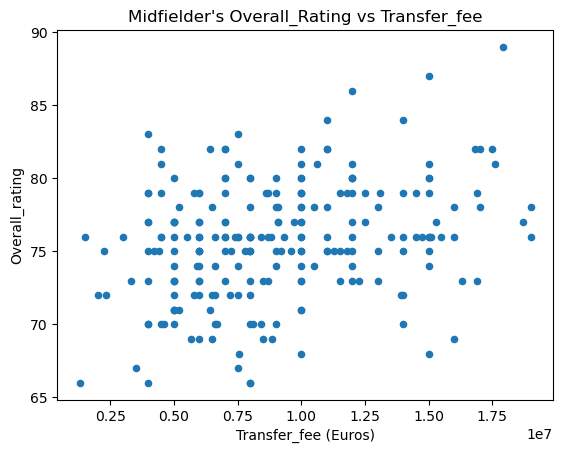

In [438]:
midDF = midDF.loc[midDF['Transfer_fee'] < 20000000]
midDF = midDF.loc[midDF['overall_rating'] > 65]
midGraph = midDF.plot.scatter(y='overall_rating',x='Transfer_fee')
midGraph.set_title("Midfielder's Overall_Rating vs Transfer_fee")
midGraph.set_ylabel("Overall_rating")
midGraph.set_xlabel("Transfer_fee (Euros)")

### Midfielder's Graph with best-fit

Text(0, 0.5, 'Transfer_fee (Euros)')

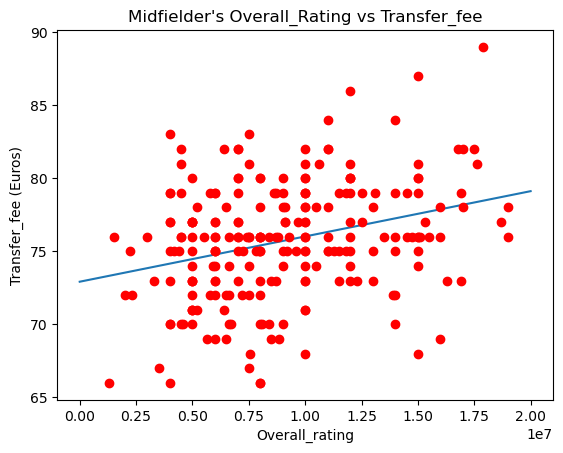

In [439]:
Y = np.array(midDF['overall_rating'])
X = np.array(midDF['Transfer_fee'])

n = len(X)
xbar = np.mean(X)
ybar = np.mean(Y)
Sxy = sum([(X[i] - xbar)*(Y[i] - ybar) for i in range(n)])
Sxx = sum([(X[i] - xbar)**2 for i in range(n)])
Beta1 = (Sxy)/(Sxx)
Beta0 = ybar - Beta1*xbar
xrange = np.linspace(0,20000000)
plt.plot(xrange,Beta0 + Beta1 * xrange)
plt.plot(X,Y,"ro")
plt.title("Midfielder's Overall_Rating vs Transfer_fee")
plt.xlabel("Overall_rating")
plt.ylabel("Transfer_fee (Euros)")

In [440]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              1332.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                    2.07e-97
Time:                        15:34:53   Log-Likelihood:                         -1101.2
No. Observations:                 230   AIC:                                      2204.
Df Residuals:                     229   BIC:                                      2208.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, "Residual Histogram for Midfielder's Data")

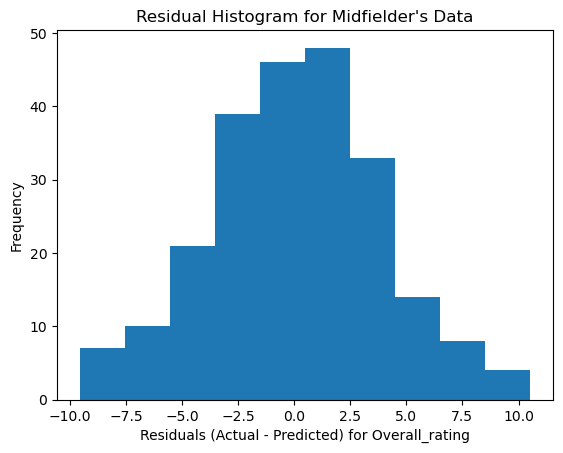

In [441]:
predicted_values = []
for x in X:
    predicted_values.append(Beta0 + Beta1 * x)

residuals = []
for idx in range(len(Y)):
    residuals.append(Y[idx] - predicted_values[idx])

plt.hist(residuals,bins=10)
plt.xlabel("Residuals (Actual - Predicted) for Overall_rating")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Midfielder's Data")


# **Conclusion:** Midfielder

Since p-value of this model is 0, it indicates that the Transfer_fee is statistically significant and can reject the null hypothesis. With an R-squared value of 0.853, it is quite good. With the line-of-best-fit plotted, we can also say that there is a slightly positive correlation between Transfer_fee and overall_rating.

As the t-value of the model is rather high meaning that the std error is rather small compared to the coefficient which signifies high significance of the coefficient

The above Residual Histogram looks good as well because it is clustering around 0 which suggest the linear model is a good fit.

Forward: Centre-Forward, Right Winger, Left Winger, Forward, Second Striker

In [442]:
forward = transfer.copy()
atkKey = ['Forward','Striker','Winger']
forward = forward[forward['Position'].str.contains('|'.join(atkKey),case=False)]
forward = forward.drop_duplicates(subset=['Name'],keep='first')
forward = forward.sort_values('Transfer_fee',ascending=False)

In [443]:
d3 = df.copy()
fwdK = ['CF','LF','LS','RF','RS','SS','ST','WF','RW','LW']
d3 = d3[d3['positions'].str.contains('|'.join(fwdK),case=False)]
d3 = d3.drop_duplicates(subset=['full_name'],keep='first')

In [444]:
forward['join'] = 1
d3['join'] = 1
dataFrameFull = d3.merge(forward, on='join').drop('join', axis=1)

forward.drop('join', axis=1, inplace=True)

dataFrameFull['match'] = dataFrameFull.apply(lambda x: x.full_name.find(x.Name), axis=1).ge(0)
r = dataFrameFull[dataFrameFull['match']]
fwdDF = r[['Name','name','full_name','positions','overall_rating','Transfer_fee']].drop_duplicates(subset=['Name']).sort_values('Transfer_fee',ascending=False)
fwdDF


,Name,name,full_name,positions,overall_rating,Transfer_fee
5781162,Neymar,Neymar Jr,Neymar da Silva Santos Junior,"LW,CAM",92,222000000
2365,Kylian Mbappé,K. Mbappé,Kylian Mbappé,"RW,ST,RM",88,135000000
5782346,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST,LW",94,117000000
20097,Ousmane Dembélé,O. Dembélé,Ousmane Dembélé,"RW,LW",84,115000000
5764620,Romelu Lukaku,R. Lukaku,Romelu Lukaku,ST,86,84700000
...,...,...,...,...,...,...
671274,Felipe,F. Flores,Felipe Ignacio Flores Chandia,"LW,ST,LM",68,2500000
226885,Borges,Jovane Cabral,Jovane Eduardo Borges Cabral,"LW,RW",75,2000000
153625,Christian,C. Benteke,Christian Benteke Liolo,ST,76,1800000
546042,Marcel,M. Hartel,Marcel Hartel,"LW,CAM",70,1800000


Text(0.5, 0, 'Transfer_fee (Euros)')

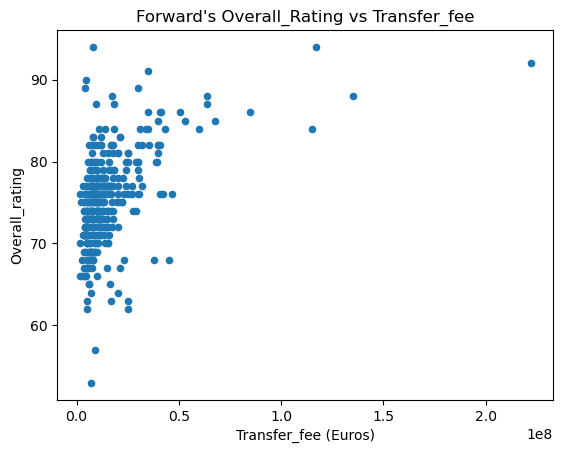

In [445]:
fwdGraph = fwdDF.plot.scatter(y='overall_rating',x='Transfer_fee')
fwdGraph.set_title("Forward's Overall_Rating vs Transfer_fee")
fwdGraph.set_ylabel("Overall_rating")
fwdGraph.set_xlabel("Transfer_fee (Euros)")

### Removing outliers based on visualization -> Transfer_fee < 0.5M Euros & overall_rating > 60

Text(0.5, 0, 'Transfer_fee (Euros)')

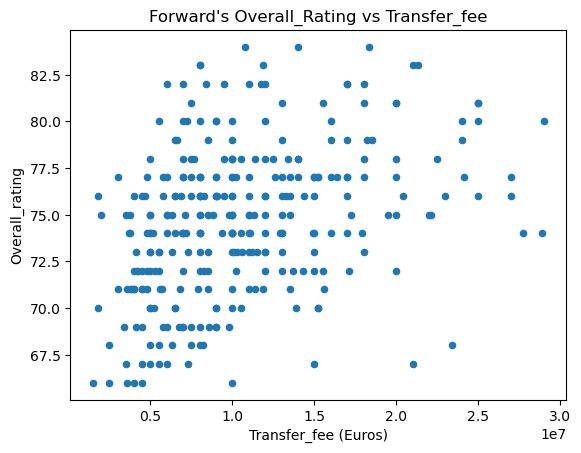

In [446]:
fwdDF = fwdDF.loc[fwdDF['Transfer_fee'] < 30000000]
fwdDF = fwdDF.loc[fwdDF['overall_rating'] > 65]
fwdDF = fwdDF.loc[fwdDF['overall_rating'] <= 85]
fwdGraph = fwdDF.plot.scatter(y='overall_rating',x='Transfer_fee')
fwdGraph.set_title("Forward's Overall_Rating vs Transfer_fee")
fwdGraph.set_ylabel("Overall_rating")
fwdGraph.set_xlabel("Transfer_fee (Euros)")

### Forward's Graph with best-fit

Text(0, 0.5, 'Transfer_fee (Euros)')

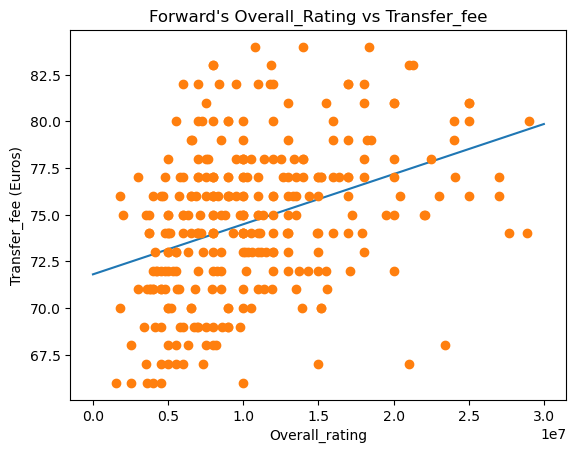

In [447]:
Y = np.array(fwdDF['overall_rating'])
X = np.array(fwdDF['Transfer_fee'])

n = len(X)
xbar = np.mean(X)
ybar = np.mean(Y)
Sxy = sum([(X[i] - xbar)*(Y[i] - ybar) for i in range(n)])
Sxx = sum([(X[i] - xbar)**2 for i in range(n)])
Beta1 = (Sxy)/(Sxx)
Beta0 = ybar - Beta1*xbar
xrange = np.linspace(0,30000000)
plt.plot(xrange,Beta0 + Beta1 * xrange)
plt.plot(X,Y,"o")
plt.title("Forward's Overall_Rating vs Transfer_fee")
plt.xlabel("Overall_rating")
plt.ylabel("Transfer_fee (Euros)")

In [448]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              1155.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                   3.30e-105
Time:                        15:37:06   Log-Likelihood:                         -1498.8
No. Observations:                 303   AIC:                                      3000.
Df Residuals:                     302   BIC:                                      3003.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, "Residual Histogram for Forward's Data")

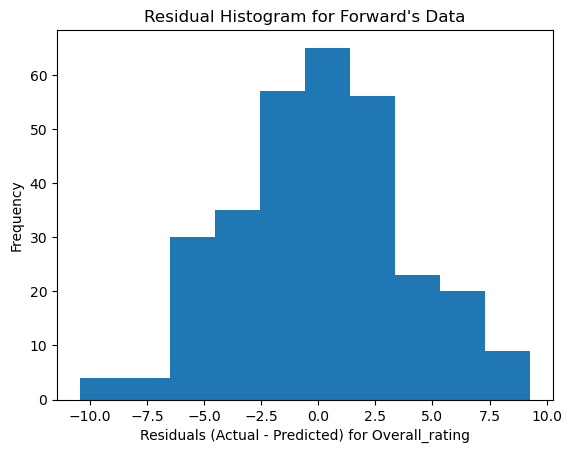

In [449]:
predicted_values = []
for x in X:
    predicted_values.append(Beta0 + Beta1 * x)

residuals = []
for idx in range(len(Y)):
    residuals.append(Y[idx] - predicted_values[idx])

plt.hist(residuals,bins=10)
plt.xlabel("Residuals (Actual - Predicted) for Overall_rating")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Forward's Data")


## **Conclusion:** Forward

Since p-value of this model is 0, it indicates that the Transfer_fee is statistically significant and can reject the null hypothesis. With an R-squared value of 0.793, it is still higher than 70% so we can say that the goodness of fit is quite ok. With the line-of-best-fit plotted, we can also say that there is a slightly positive correlation between Transfer_fee and overall_rating.

As the t-value of the model is rather high meaning that the std error is rather small compared to the coefficient which signifies high significance of the coefficient

The above Residual Histogram looks good as well because it is clustering around 0 which suggest the linear model is a good fit.

Overall, ranking by Log-Likelihood values of all the models, Goalkeepers have the highest value suggesting that the model best fits the data. Followed by Defender, Midfielder then Forward. As well as all the Regression results shows a really low std error suggesting that it is a good model and fits the data pretty well.